In [18]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt

We will use the American Community Survey 2021 dataset available from census.gov for our example data analysis. The data is available via API from here: https://www.census.gov/data/developers/data-sets/acs-1year.html

In [ ]:
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,B19001_008E,B19001_009E,B19001_010E,B19001_011E,B19001_012E,B19001_013E,B19001_014E,B19001_015E,B19001_016E,B19001_017E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
data_json.pop(0)

['NAME',
 'B19001_001E',
 'B19001_002E',
 'B19001_003E',
 'B19001_004E',
 'B19001_005E',
 'B19001_006E',
 'B19001_007E',
 'B19001_008E',
 'B19001_009E',
 'B19001_010E',
 'B19001_011E',
 'B19001_012E',
 'B19001_013E',
 'B19001_014E',
 'B19001_015E',
 'B19001_016E',
 'B19001_017E',
 'state',
 'congressional district']

In [ ]:
cols = ['District Name','Total Households','Less than $10k', '$10k to $15k', '$15k to $20k', '$20k to $25k', '$25k to $30k', '$30k to $35k', '$35k to $40k', '$40k to $45k', '$45k to $50k', '$50k to 60k', '$60k to $75k', '$75k to $100k', '$100k to $125k', '$125k to $150k', '$150k to $200k', '$200k+', 'State code', 'district number']

df = pd.DataFrame(data_json, columns = cols)

The description of columns can be found here: https://api.census.gov/data/2021/acs/acs1/variables.html. Let's take a look at what columns were pulled down in our data.

In [ ]:
df.head()

,District Name,Total Households,Less than $10k,$10k to $15k,$15k to $20k,$20k to $25k,$25k to $30k,$30k to $35k,$35k to $40k,$40k to $45k,$45k to $50k,$50k to 60k,$60k to $75k,$75k to $100k,$100k to $125k,$125k to $150k,$150k to $200k,$200k+,State code,district number
0,"Congressional District 10 (116th Congress), Mi...",289474,14153,8574,9605,10319,10870,11707,10783,13658,12482,22164,31054,40352,28842,22277,23244,19390,26,10
1,"Congressional District 4 (116th Congress), Mis...",299804,23793,16264,14008,15316,20125,14790,13814,16133,10919,23078,28276,38467,27735,13785,12402,10899,28,04
2,"Congressional District 14 (116th Congress), Mi...",278057,27728,14359,12752,13289,13759,12459,14673,12675,9952,21018,23043,29275,20611,12951,19939,19574,26,14
3,"Congressional District 1 (116th Congress), Mic...",306685,19036,14152,13144,13468,14771,15786,14240,15052,12376,28108,33589,43639,28864,14715,13537,12208,26,01
4,"Congressional District 3 (116th Congress), Mis...",285554,26481,16824,13989,16009,13069,13606,15042,13777,10013,21038,27346,32678,22071,15815,15384,12412,28,03


Let's rename these columns based on the descriptions from the census so they are more human readable.

In [ ]:
df["Total Households"] = pd.to_numeric(df["Total Households"])
df["Less than $10k"] = pd.to_numeric(df["Less than $10k"])
df['$10k to $15k'] = pd.to_numeric(df['$10k to $15k'])
df['$15k to $20k'] = pd.to_numeric(df['$15k to $20k'])
df['$20k to $25k'] = pd.to_numeric(df['$20k to $25k'])
df['$25k to $30k'] = pd.to_numeric(df['$25k to $30k'])
df['$30k to $35k'] = pd.to_numeric(df['$30k to $35k'])
df['$35k to $40k'] = pd.to_numeric(df['$35k to $40k'])
df['$40k to $45k'] = pd.to_numeric(df['$40k to $45k'])

# '$10k to $15k', '$15k to $20k', '$20k to $25k', '$25k to $30k', '$30k to $35k', '$35k to $40k', '$40k to $45k', '$45k to $50k', '$50k to 60k', '$60k to $75k', '$75k to $100k', '$100k to $125k', '$125k to $150k', '$150k to $200k', '$200k+'

In [ ]:
df.sort_values('Total Households', ascending=False).head()

,District Name,Total Households,Less than $10k,$10k to $15k,$15k to $20k,$20k to $25k,$25k to $30k,$30k to $35k,$35k to $40k,$40k to $45k,$45k to $50k,$50k to 60k,$60k to $75k,$75k to $100k,$100k to $125k,$125k to $150k,$150k to $200k,$200k+,State code,district number
354,Resident Commissioner District (at Large) (116...,1165982,286499,132217,118108,95934,80680,68290,57630,44777,38025,57373,67045,52813,25145,13678,11910,15858,72,98
228,Congressional District (at Large) (116th Congr...,448949,23195,18852,17978,19187,21275,19387,21825,18695,18117,34567,49372,58776,40723,26653,29563,30784,30,00
105,Congressional District (at Large) (116th Congr...,395656,20504,12424,14048,14630,12650,14963,13473,16130,16947,30580,40495,53506,40262,23969,38050,33025,10,00
120,"Congressional District 1 (116th Congress), Col...",377896,21584,12359,9574,11193,10647,10706,9649,13513,11221,25533,34597,48380,36114,32960,38056,51810,08,01
64,"Congressional District 7 (116th Congress), Was...",373393,18604,8160,8750,8160,8493,8884,10453,10794,6482,20827,26040,36145,36771,27519,43213,94098,53,07


In [1]:
df_unpivot = pd.melt(df, id_vars='District Name', value_vars=['Total Households', 'Less than $10k', '$10k to $15k'])

NameError: ignored

<AxesSubplot:>

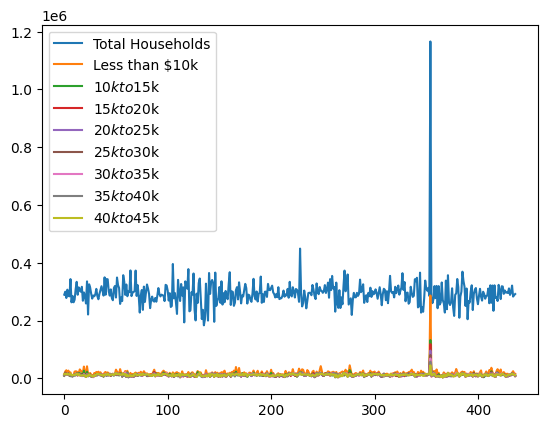

In [ ]:
df.plot()

ValueError: ignored

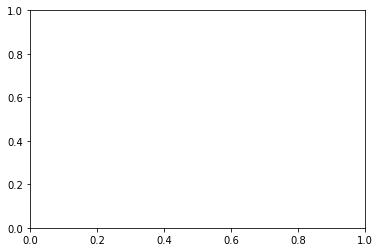

In [24]:
df_unpivot.plot(color=df_unpivot['District Name'])

AttributeError: ignored

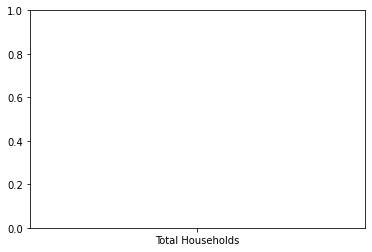

In [19]:
plt.bar(df_unpivot["variable"], df_unpivot["value"], hue=df_unpivot["District Name"])

